In [1]:
import findspark
findspark.init('/usr/local/spark')
import pyspark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Pyspark SQL").getOrCreate()

In [3]:
custdf= spark.read.load("customers.txt", format="csv", sep ="\t", inferSchema="true", header= "true")


In [4]:
custdf.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_zipcode: integer (nullable = true)



In [5]:
custdf.select("customer_name").show()

+----------------+
|   customer_name|
+----------------+
|     Mary Torres|
|      Jose Haley|
|      Mary Smith|
|  Richard Maddox|
|  Margaret Booth|
|  Mary Henderson|
|     Lisa Walker|
|   Jonathan Hill|
|Carolyn Sheppard|
|    Mary Mendoza|
|   Michael Smith|
|    James Holmes|
|     Mary Dawson|
|    Adam Marquez|
|    Gloria Smith|
|       Mary Webb|
|  Nancy Alvarado|
|  Russell Flores|
|    Denise Smith|
|  Jose Dickerson|
+----------------+
only showing top 20 rows



In [6]:
custdf.select(custdf['customer_name'],custdf['customer_city'] ).show(5)

+--------------+-------------+
| customer_name|customer_city|
+--------------+-------------+
|   Mary Torres|       Caguas|
|    Jose Haley|     Columbus|
|    Mary Smith|      Houston|
|Richard Maddox|       Caguas|
|Margaret Booth|    Arlington|
+--------------+-------------+
only showing top 5 rows



In [7]:
custdf.select("*").show()

+-----------+----------------+-------------+--------------+----------------+
|customer_id|   customer_name|customer_city|customer_state|customer_zipcode|
+-----------+----------------+-------------+--------------+----------------+
|      11039|     Mary Torres|       Caguas|            PR|             725|
|       5623|      Jose Haley|     Columbus|            OH|           43207|
|       5829|      Mary Smith|      Houston|            TX|           77015|
|       6336|  Richard Maddox|       Caguas|            PR|             725|
|       1708|  Margaret Booth|    Arlington|            TX|           76010|
|      10227|  Mary Henderson|       Caguas|            PR|             725|
|        839|     Lisa Walker|       Caguas|            PR|             725|
|       7604|   Jonathan Hill|      Phoenix|            AZ|           85040|
|       6485|Carolyn Sheppard|Pompano Beach|            FL|           33063|
|       4737|    Mary Mendoza|       Caguas|            PR|             725|

In [8]:
custdf.select(custdf.columns[1:4]).show()

+----------------+-------------+--------------+
|   customer_name|customer_city|customer_state|
+----------------+-------------+--------------+
|     Mary Torres|       Caguas|            PR|
|      Jose Haley|     Columbus|            OH|
|      Mary Smith|      Houston|            TX|
|  Richard Maddox|       Caguas|            PR|
|  Margaret Booth|    Arlington|            TX|
|  Mary Henderson|       Caguas|            PR|
|     Lisa Walker|       Caguas|            PR|
|   Jonathan Hill|      Phoenix|            AZ|
|Carolyn Sheppard|Pompano Beach|            FL|
|    Mary Mendoza|       Caguas|            PR|
|   Michael Smith|       Caguas|            PR|
|    James Holmes|     Hilliard|            OH|
|     Mary Dawson|       Caguas|            PR|
|    Adam Marquez|  San Antonio|            TX|
|    Gloria Smith|       Caguas|            PR|
|       Mary Webb|   San Marcos|            TX|
|  Nancy Alvarado|     Flushing|            NY|
|  Russell Flores|       Caguas|        

In [9]:
df= custdf.collect()
print(df)

[Row(customer_id=11039, customer_name='Mary Torres', customer_city='Caguas', customer_state='PR', customer_zipcode=725), Row(customer_id=5623, customer_name='Jose Haley', customer_city='Columbus', customer_state='OH', customer_zipcode=43207), Row(customer_id=5829, customer_name='Mary Smith', customer_city='Houston', customer_state='TX', customer_zipcode=77015), Row(customer_id=6336, customer_name='Richard Maddox', customer_city='Caguas', customer_state='PR', customer_zipcode=725), Row(customer_id=1708, customer_name='Margaret Booth', customer_city='Arlington', customer_state='TX', customer_zipcode=76010), Row(customer_id=10227, customer_name='Mary Henderson', customer_city='Caguas', customer_state='PR', customer_zipcode=725), Row(customer_id=839, customer_name='Lisa Walker', customer_city='Caguas', customer_state='PR', customer_zipcode=725), Row(customer_id=7604, customer_name='Jonathan Hill', customer_city='Phoenix', customer_state='AZ', customer_zipcode=85040), Row(customer_id=6485, 

In [10]:
custdf.filter(custdf['customer_state']== 'CA') .show()   

+-----------+----------------+---------------+--------------+----------------+
|customer_id|   customer_name|  customer_city|customer_state|customer_zipcode|
+-----------+----------------+---------------+--------------+----------------+
|       5577|      Mary Smith|        Modesto|            CA|           95350|
|       1745|      Mary Smith|Rowland Heights|            CA|           91748|
|      11444|Kathleen Patrick|      San Diego|            CA|           92109|
|       8846|    Thomas Smith|          Indio|            CA|           92201|
|       6237|  Bobby Anderson|       El Cajon|            CA|           92020|
|       4085|       Mary Carr|  Panorama City|            CA|           91402|
|       8705|  Patricia Smith|       Stockton|            CA|           95207|
|       3669|       Mary Soto| San Bernardino|            CA|           92410|
|       6101|      Mary Smith|    Los Angeles|            CA|           90033|
|      11697|  Jessica Thomas|  Laguna Niguel|      

In [11]:
custdf.groupBy("customer_state").count().show()

+--------------+-----+
|customer_state|count|
+--------------+-----+
|            AZ|   19|
|            SC|    2|
|            LA|    7|
|            MN|    1|
|            NJ|   19|
|            DC|    4|
|            OR|    4|
|            VA|   14|
|            RI|    2|
|            KY|    1|
|            MI|   28|
|            NV|   16|
|            WI|    9|
|            ID|    2|
|            CA|  187|
|            CT|    8|
|            NC|   19|
|            MD|   19|
|            DE|    1|
|            MO|   13|
+--------------+-----+
only showing top 20 rows



In [12]:
custdf.groupBy("customer_state").min("customer_zipcode").show()

+--------------+---------------------+
|customer_state|min(customer_zipcode)|
+--------------+---------------------+
|            AZ|                85008|
|            SC|                29223|
|            LA|                70065|
|            MN|                55124|
|            NJ|                 7047|
|            DC|                20002|
|            OR|                97206|
|            VA|                22003|
|            RI|                 2860|
|            KY|                40601|
|            MI|                48093|
|            NV|                89030|
|            WI|                53081|
|            ID|                83642|
|            CA|                90001|
|            CT|                 6010|
|            NC|                27203|
|            MD|                20744|
|            DE|                19711|
|            MO|                63031|
+--------------+---------------------+
only showing top 20 rows



In [13]:
li = ["OH","CA","DE"]
custdf.filter(custdf.customer_state.isin(li)).show()

+-----------+----------------+---------------+--------------+----------------+
|customer_id|   customer_name|  customer_city|customer_state|customer_zipcode|
+-----------+----------------+---------------+--------------+----------------+
|       5623|      Jose Haley|       Columbus|            OH|           43207|
|       9205|    James Holmes|       Hilliard|            OH|           43026|
|       5577|      Mary Smith|        Modesto|            CA|           95350|
|       5013|     Mary Peters|   Reynoldsburg|            OH|           43068|
|       1745|      Mary Smith|Rowland Heights|            CA|           91748|
|      11444|Kathleen Patrick|      San Diego|            CA|           92109|
|       8846|    Thomas Smith|          Indio|            CA|           92201|
|       6237|  Bobby Anderson|       El Cajon|            CA|           92020|
|       4085|       Mary Carr|  Panorama City|            CA|           91402|
|       8705|  Patricia Smith|       Stockton|      

In [14]:
custdf.filter(custdf.customer_state.startswith("O")).show()

+-----------+--------------+-------------+--------------+----------------+
|customer_id| customer_name|customer_city|customer_state|customer_zipcode|
+-----------+--------------+-------------+--------------+----------------+
|       5623|    Jose Haley|     Columbus|            OH|           43207|
|       9205|  James Holmes|     Hilliard|            OH|           43026|
|       5013|   Mary Peters| Reynoldsburg|            OH|           43068|
|        759|   Donna Smith|       Lawton|            OK|           73505|
|       7173|    Mary Glass|        Salem|            OR|           97303|
|      11916|    Mary Smith|   Cincinnati|            OH|           45238|
|       5377| Crystal Jones|   Middletown|            OH|           45044|
|      11114|    Mary Owens|     Columbus|            OH|           43230|
|       9326|    Linda Hess|     Portland|            OR|           97206|
|      11342| Steven Booker|        Salem|            OR|           97303|
|       2043|    Mary Smi

In [15]:
custdf.filter(custdf.customer_state.endswith("A")).show()

+-----------+----------------+---------------+--------------+----------------+
|customer_id|   customer_name|  customer_city|customer_state|customer_zipcode|
+-----------+----------------+---------------+--------------+----------------+
|       5577|      Mary Smith|        Modesto|            CA|           95350|
|       1745|      Mary Smith|Rowland Heights|            CA|           91748|
|      11444|Kathleen Patrick|      San Diego|            CA|           92109|
|       6087|    Evelyn Smith|       Norcross|            GA|           30093|
|       6309|   Cynthia Smith|       Carlisle|            PA|           17013|
|       8846|    Thomas Smith|          Indio|            CA|           92201|
|       6237|  Bobby Anderson|       El Cajon|            CA|           92020|
|       9481|     Julie Smith|       Lynnwood|            WA|           98037|
|       1634|     Jason Riggs|    Morrisville|            PA|           19067|
|       4085|       Mary Carr|  Panorama City|      

In [16]:
custdf.withColumn("customer_new", custdf["customer_zipcode"]*10).show()

+-----------+----------------+-------------+--------------+----------------+------------+
|customer_id|   customer_name|customer_city|customer_state|customer_zipcode|customer_new|
+-----------+----------------+-------------+--------------+----------------+------------+
|      11039|     Mary Torres|       Caguas|            PR|             725|        7250|
|       5623|      Jose Haley|     Columbus|            OH|           43207|      432070|
|       5829|      Mary Smith|      Houston|            TX|           77015|      770150|
|       6336|  Richard Maddox|       Caguas|            PR|             725|        7250|
|       1708|  Margaret Booth|    Arlington|            TX|           76010|      760100|
|      10227|  Mary Henderson|       Caguas|            PR|             725|        7250|
|        839|     Lisa Walker|       Caguas|            PR|             725|        7250|
|       7604|   Jonathan Hill|      Phoenix|            AZ|           85040|      850400|
|       64

In [17]:
custdf.createOrReplaceTempView("customers")

My SQL queries canm run on dataframes which i have created from view

In [18]:
custStateCount = spark.sql("SELECT customer_state, count(*) as state_count FROM customers GROUP BY customer_state HAVING state_count>=50")

In [19]:
type(custStateCount)

pyspark.sql.dataframe.DataFrame

In [20]:
custStateCount.show()

+--------------+-----------+
|customer_state|state_count|
+--------------+-----------+
|            CA|        187|
|            NY|         79|
|            TX|         62|
|            PR|        505|
+--------------+-----------+



In [21]:
custStateCount.printSchema()

root
 |-- customer_state: string (nullable = true)
 |-- state_count: long (nullable = false)



In [22]:
custStateCount.coalesce(1).write.mode('overwrite').parquet("custStateCountparq")

In [23]:
custStateCount.write.mode("overwrite").json("custStateCount4json")

In [24]:
custStateCount.write.options(header='True', delimiter=',').csv("custStateCountcsv")

AnalysisException: 'path file:/home/hduser/Downloads/sharedfolder/custStateCountcsv already exists.;'

In [25]:
productdf = spark.read.load("products.json", format="json")

In [26]:
productdf.printSchema()

root
 |-- category_id: long (nullable = true)
 |-- customer_id: long (nullable = true)
 |-- product_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- product_price: double (nullable = true)
 |-- product_quantity: long (nullable = true)
 |-- salestxn_id: long (nullable = true)



In [27]:
productdf.show(5)

+-----------+-----------+----------------+--------------------+-------------+----------------+-----------+
|category_id|customer_id|product_category|        product_name|product_price|product_quantity|salestxn_id|
+-----------+-----------+----------------+--------------------+-------------+----------------+-----------+
|         45|      12080|         Fishing|O'Brien Men's Neo...|        49.98|               2|      98660|
|         45|      12279|         Fishing|O'Brien Men's Neo...|        49.98|               2|      97749|
|         12|       3343|    Boxing & MMA|Under Armour Wome...|        31.99|               4|     103889|
|         45|      12382|         Fishing|O'Brien Men's Neo...|        49.98|               5|      22751|
|         47|       5032|         Boating|Pelican Sunstream...|       199.99|               1|     129001|
+-----------+-----------+----------------+--------------------+-------------+----------------+-----------+
only showing top 5 rows



1. print the schema
2. display the product name , category AND PRICE
3. DISPLAY THE RECORDS WHERE SALARY IS GREATER THAN 200
4. COUNT THE NUMBER OF PRODUCT IN EACH CATEGORY
5. CREATE A NEW COL INCREAMENTED SALARY BY INCREMENTING THE SALARY OF EACH EMPLOYEE BY 10 %
6. create a temp view for the below output
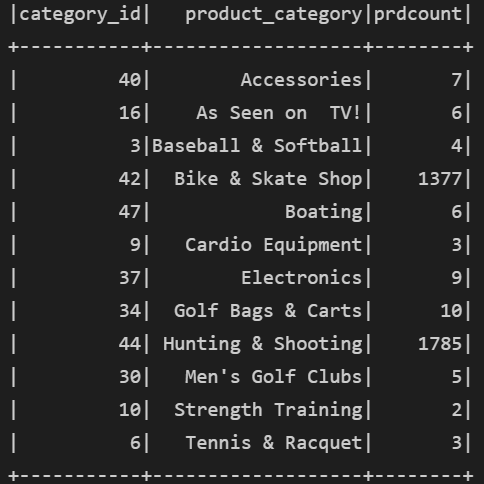

In [28]:
productdf.createOrReplaceTempView("products")

In [29]:
prd200 = spark.sql("SELECT category_id, product_category, count(*) as prdcount FROM products WHERE product_price>200 GROUP BY category_id, product_category ORDER BY product_category")

In [30]:
prd200.show(10)

+-----------+-------------------+--------+
|category_id|   product_category|prdcount|
+-----------+-------------------+--------+
|         40|        Accessories|       7|
|         16|    As Seen on  TV!|       6|
|          3|Baseball & Softball|       4|
|         42|  Bike & Skate Shop|    1377|
|         47|            Boating|       6|
|          9|   Cardio Equipment|       3|
|         37|        Electronics|       9|
|         34|  Golf Bags & Carts|      10|
|         44| Hunting & Shooting|    1785|
|         30|   Men's Golf Clubs|       5|
+-----------+-------------------+--------+
only showing top 10 rows



In [31]:
custdf.printSchema()

root
 |-- customer_id: integer (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)
 |-- customer_zipcode: integer (nullable = true)



In [32]:
productdf.printSchema()

root
 |-- category_id: long (nullable = true)
 |-- customer_id: long (nullable = true)
 |-- product_category: string (nullable = true)
 |-- product_name: string (nullable = true)
 |-- product_price: double (nullable = true)
 |-- product_quantity: long (nullable = true)
 |-- salestxn_id: long (nullable = true)



Get the list of customers and product categories in which they bought multiple items (quantity) that are more expensive than 200.00
customer_name    product_category  prdcount
David Smith     Hunting & Shooting   2

In [33]:
custlist200 = spark.sql("SELECT a.customer_name, b.product_category, count(*) as prdcount FROM customers a INNER JOIN products b ON a.customer_id=b.customer_id WHERE b.product_price>200.00 GROUP BY a.customer_name, b.product_category HAVING prdcount>1")

In [35]:
custlist200.show()

+-----------------+------------------+--------+
|    customer_name|  product_category|prdcount|
+-----------------+------------------+--------+
|      David Smith|Hunting & Shooting|       2|
|    William Weiss|Hunting & Shooting|       2|
|    William Smith| Bike & Skate Shop|       2|
|    William Smith|Hunting & Shooting|       3|
|       Mary Smith| Bike & Skate Shop|      22|
|   Kimberly Blair|Hunting & Shooting|       2|
|     William Clay|Hunting & Shooting|       2|
|   Margaret Smith|Hunting & Shooting|       2|
|    Russell Smith|Hunting & Shooting|       2|
|       Mary Lopez| Bike & Skate Shop|       2|
|      Louis Novak|Hunting & Shooting|       2|
|      Linda Smith| Bike & Skate Shop|       2|
|       Mary Black| Bike & Skate Shop|       2|
|       Linda Hale| Bike & Skate Shop|       2|
|    Mary Gonzales|Hunting & Shooting|       2|
|   Jesse Matthews|Hunting & Shooting|       2|
|      Mary Daniel| Bike & Skate Shop|       2|
|     Albert Smith|Hunting & Shooting|  